<a href="https://colab.research.google.com/github/gayathri2510/aquap/blob/master/Aquaponic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset/Pond0(1).csv")

In [ ]:
df.head()

,year,month,date,hours,min,sec,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Fish_Length(cm),Fish_Weight(g)
0,2021,6,18,16,48,11,24.0625,20,6.811,7.86167,0.493857,11.445523,6.947143,4.371429
1,2021,6,19,0,2,3,23.7500,80,10.310,7.07635,0.165149,10.630146,6.740000,3.200000
2,2021,6,19,0,6,31,23.7500,80,13.060,7.04003,0.170108,10.535654,6.740000,3.200000
3,2021,6,19,0,8,31,23.6875,80,11.676,7.09450,0.173166,10.440307,6.740000,3.200000
4,2021,6,19,0,9,10,23.7500,80,17.273,7.08542,0.175461,10.535654,6.740000,3.200000


In [ ]:
df.isnull().sum()

year                      0
month                     0
date                      0
hours                     0
min                       0
sec                       0
Temperature (C)           0
Turbidity(NTU)            0
Dissolved Oxygen(g/ml)    0
PH                        0
Ammonia(g/ml)             0
Nitrate(g/ml)             0
Fish_Length(cm)           0
Fish_Weight(g)            0
dtype: int64

In [ ]:
df=df.dropna(axis=0,how="any",inplace=False)

In [ ]:
df.isnull().sum()

year                      0
month                     0
date                      0
hours                     0
min                       0
sec                       0
Temperature (C)           0
Turbidity(NTU)            0
Dissolved Oxygen(g/ml)    0
PH                        0
Ammonia(g/ml)             0
Nitrate(g/ml)             0
Fish_Length(cm)           0
Fish_Weight(g)            0
dtype: int64

In [ ]:
corr=df.corr()

In [ ]:
import seaborn as sns

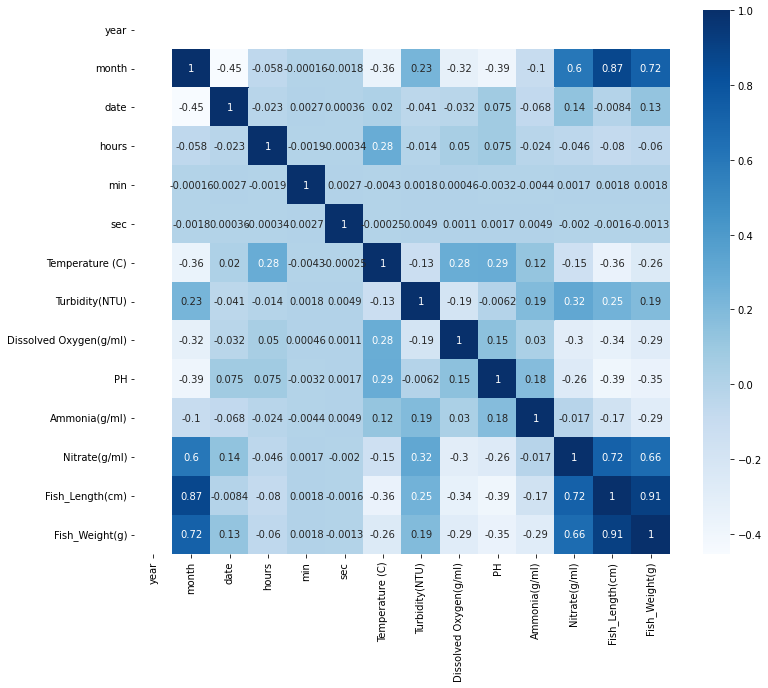

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
df=df.drop(["min","sec"],axis=1)

In [ ]:
df=df.drop(["year"],axis=1)

In [ ]:
corr1=df.corr()

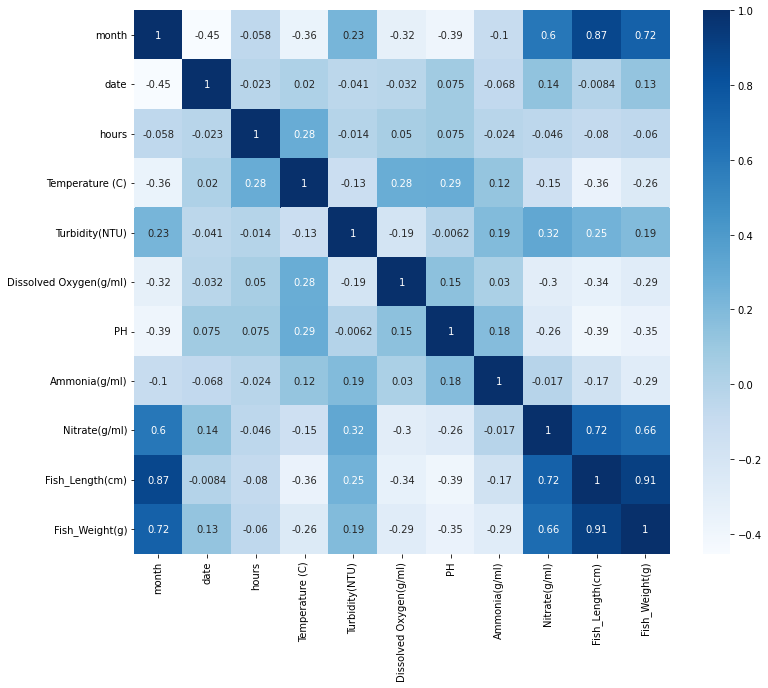

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr1, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
df=df.drop(["hours","date","Temperature (C)"],axis=1)

In [ ]:
corr2=df.corr()

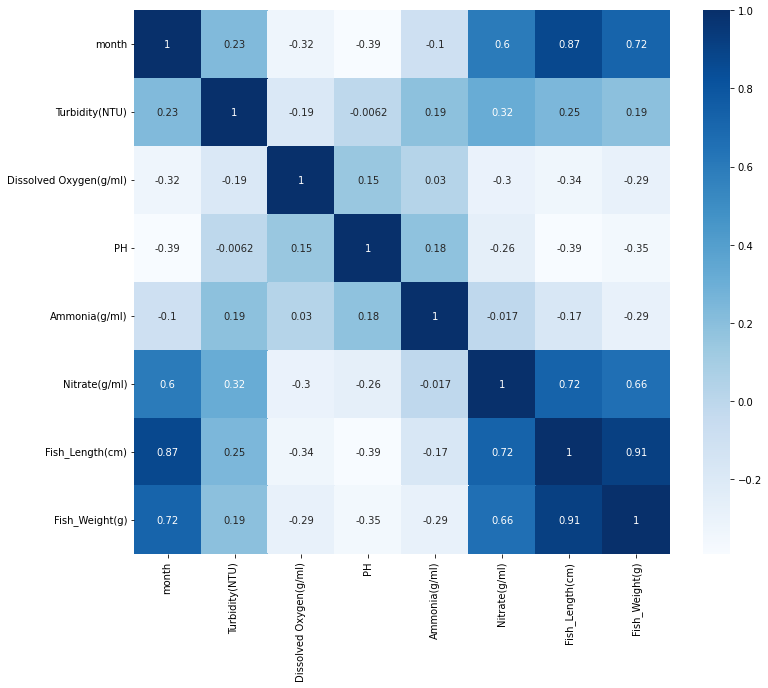

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr2, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
def df_predict(df, row):
  n_col = df.shape[1]
  col = [i for i in range(n_col)]
  #row is for predicting which row 
  y = df.iloc[:,row]
  # print👍
  col.pop(row)
  X=df.iloc[:,col]
  # print(X)
  x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 1)
  # print(x_train, x_test, y_train, y_test)
  model = LinearRegression()
  model.fit(x_train,y_train)
  print("\nModel trained")
  Pred = model.predict(x_test)
  print(f"\nPredicting column {df.columns[row]}")
  # for i in range(Pred.shape[0]):
  #   print(y_test.to_numpy()[i],Pred[i],'\n')
  r2 = r2_score(y_test,Pred)
  print(f"R2 score will be {r2}")
  m = mean_absolute_error(y_test,Pred)
  print(f"MAE will be {m}")

In [ ]:
df_predict(df,6)


Model trained

Predicting column Fish_Length(cm)
R2 score will be 0.9402805141213321
MAE will be 0.8973078299802839


In [ ]:
df_predict(df,5)


Model trained

Predicting column Nitrate(g/ml)
R2 score will be 0.559472019703269
MAE will be 4.433933760322761


In [ ]:
for i in range(0,8):
  df_predict(df,i)


Model trained

Predicting column month
R2 score will be 0.8069497498201791
MAE will be 0.23967772055839348

Model trained

Predicting column Turbidity(NTU)
R2 score will be 0.15887554571146079
MAE will be 16.29726407123612

Model trained

Predicting column Dissolved Oxygen(g/ml)
R2 score will be 0.13270209493240426
MAE will be 3.155419611333432

Model trained

Predicting column PH
R2 score will be 0.18734079548033367
MAE will be 0.1794418479542587

Model trained

Predicting column Ammonia(g/ml)
R2 score will be 0.20160500733706532
MAE will be 0.1661055834103044

Model trained

Predicting column Nitrate(g/ml)
R2 score will be 0.559472019703269
MAE will be 4.433933760322761

Model trained

Predicting column Fish_Length(cm)
R2 score will be 0.9402805141213321
MAE will be 0.8973078299802839

Model trained

Predicting column Fish_Weight(g)
R2 score will be 0.8732520659627283
MAE will be 8.353874179730415


In [ ]:
df.head()

,month,Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Fish_Length(cm),Fish_Weight(g)
0,6,20,6.811,7.86167,0.493857,11.445523,6.947143,4.371429
1,6,80,10.310,7.07635,0.165149,10.630146,6.740000,3.200000
2,6,80,13.060,7.04003,0.170108,10.535654,6.740000,3.200000
3,6,80,11.676,7.09450,0.173166,10.440307,6.740000,3.200000
4,6,80,17.273,7.08542,0.175461,10.535654,6.740000,3.200000


In [ ]:
x=df.drop(["Nitrate(g/ml)"],axis=1)
y=df.loc[:,"Nitrate(g/ml)"]

In [ ]:
x.head()

,month,Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Fish_Length(cm),Fish_Weight(g)
0,6,20,6.811,7.86167,0.493857,6.947143,4.371429
1,6,80,10.310,7.07635,0.165149,6.740000,3.200000
2,6,80,13.060,7.04003,0.170108,6.740000,3.200000
3,6,80,11.676,7.09450,0.173166,6.740000,3.200000
4,6,80,17.273,7.08542,0.175461,6.740000,3.200000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE: 0.312501487733626
MSE: 0.3381131442373685
R2 score 0.9952287869545572
RMSE 0.5814749730103339
